In [2]:
import pandas as pd
# for anyone that may need
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("car_data.csv")

df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [3]:
#Removing commas in Price Column
df['Price']=df['Price'].str.replace(',','')

#Converting Price currency from Indian Rupees to US Dollars
df['Price'] = pd.to_numeric(df['Price'])
df.loc[:, 'Price'] *= 0.012

#Converting No. Owners from String description to int
df['No_of_Owners']=df['No_of_Owners'].str.replace('1st', "1")
df['No_of_Owners']=df['No_of_Owners'].str.replace('2nd', "2")
df['No_of_Owners']=df['No_of_Owners'].str.replace('3rd', "3")
df['No_of_Owners'] = pd.to_numeric(df['No_of_Owners'])

df = df.rename(columns = {"Fuel_Tank_Capacity(L)" : "Fuel_Tank_Capacity(G)"})
df.loc[:, 'Fuel_Tank_Capacity(G)'] /= 3.785

df.head()

/tmp/ipykernel_1133008/1313943566.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Price'] *= 0.012


,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1,5,diesel,11.889036,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,7884.0
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1,5,petrol,11.889036,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,8184.0
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2,5,petrol,10.568032,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,9516.0
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1,5,petrol,7.397622,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,4968.0
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1,5,petrol,11.360634,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,6180.0


In [0]:
mat_df = df[["Price", "Make_Year"]]

In [4]:
df['Car_Name'].unique
df['Car_Name'].value_counts()["MG Motors Hector 2.0 Sharp"]

24

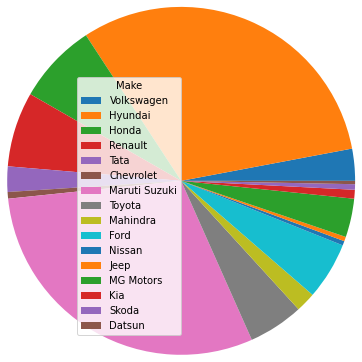

In [77]:
makes = df['Make'].unique()
total = len(df.index)
makes_perc = []
for make in makes:
    makes_perc.append((df['Make'].value_counts()[make]/total)*100)

plt.pie(makes_perc, center = (10,20), radius = 2)
plt.legend(makes, loc='upper left', title = "Make")

plt.show()

In [4]:
sorted = df.sort_values(by=['Price'])
import plotly.express as px #importing plotly

In [16]:
#cheapest 10
# sorted.head(10)
small = sorted.head(100)[['Make', 'Power(BHP)', 'Transmission', 'Price']]
fig1 = px.scatter(small, x  ='Power(BHP)', y = "Price", color = 'Make')
fig1.show()


In [139]:
sorted.head(10)

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
921,Tata Nano [2008-2014] LX,Tata,Nano,2013,blue,hatchback,"33,744",1,4,petrol,3.963012,"624 cc, 2 cylinder, MPFI",624,4-Speed,Manual,35.00,48.00,18.4,BS IV,2256.0
30,Maruti Suzuki Alto K10 [2010-2014] VXi,Maruti Suzuki,Alto K10,2011,red,hatchback,"79,565",1,5,petrol,9.247028,K Series Petrol Engine,998,5-Speed,Manual,67.10,90.00,20.92,BS IV,2844.0
272,Tata Nano GenX [2015-2018] XT,Tata,Nano GenX,2015,purple,hatchback,"44,736",1,5,petrol,6.340819,"2 cylinder, MPFI, Gasoline",624,4-Speed,Manual,37.00,51.00,23.6,BS IV,2868.0
848,Maruti Suzuki Alto K10 [2010-2014] VXi,Maruti Suzuki,Alto K10,2011,black,hatchback,"60,256",2,5,petrol,9.247028,K Series Petrol Engine,998,5-Speed,Manual,67.10,90.00,20.92,BS IV,2940.0
196,Hyundai Eon [2011-2018] Magna +,Hyundai,Eon,2013,red,hatchback,"93,653",2,5,petrol,8.454425,Kappa Engine,814,5-Speed,Manual,68.05,94.14,20.03,BS IV,2976.0
504,Maruti Suzuki Alto K10 [2010-2014] VXi,Maruti Suzuki,Alto K10,2011,silver,hatchback,"82,262",2,5,petrol,9.247028,K Series Petrol Engine,998,5-Speed,Manual,67.10,90.00,20.92,BS IV,3060.0
499,Maruti Suzuki Alto K10 [2010-2014] LXi,Maruti Suzuki,Alto K10,2011,black,hatchback,"54,857",2,5,petrol,9.247028,K10B,998,5-Speed,Manual,67.10,90.00,20.92,BS IV,3144.0
584,Maruti Suzuki Alto [2010-2013] LXI,Maruti Suzuki,Alto,2011,black,hatchback,"16,061",2,5,petrol,9.247028,In-Line Engine,796,5-Speed,Manual,46.30,62.00,19.7,BS IV,3192.0
254,Chevrolet Beat [2011-2014] LS Diesel,Chevrolet,Beat,2013,blue,hatchback,"77,022",1,5,diesel,9.247028,XSDE Smartech,936,5-Speed,Manual,58.00,150.00,25.44,BS IV,3204.0
214,Hyundai Eon [2011-2018] D-Lite+,Hyundai,Eon,2014,grey,hatchback,"38,592",2,5,petrol,8.454425,Petrol Engine,1798,5-Speed,Manual,55.20,74.50,21.1,BS IV,3228.0


In [17]:
#most expensive 10
#sorted.tail(10)
big = sorted.tail(100)[['Make', 'Power(BHP)', 'Transmission', "Body_Type",'Price']]
fig2 = px.scatter(big, x  ='Power(BHP)', y = "Price", color = 'Make')
fig2.show()

#tends to be a lot more variety in the 100 most expensive rather than least